In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from littleballoffur import PageRankBasedSampler


# Import and create graph

In [5]:

df = pd.read_csv('twitch_gamers_dataset/large_twitch_edges.csv')
df.head()


,numeric_id_1,numeric_id_2
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


In [6]:
G = nx.from_pandas_edgelist(df, source='numeric_id_1', target='numeric_id_2')

In [15]:

# number_of_nodes = int(0.35*G.number_of_nodes())
# sampler = PageRankBasedSampler(number_of_nodes = number_of_nodes)
# G = sampler.sample(G)

# Helper Function for Plotting

In [8]:


import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('ggplot')
#plt.style.use('seaborn-ticks')
#plt.style.use('seaborn-notebook')
plt.rcParams['lines.linewidth']=3
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=14

    
def plot_distribution (data, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False) :
    counts = {}
    for item in data :
        if item not in counts :
            counts [ item ] = 0
        counts [ item ] += 1
    counts = sorted ( counts.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.scatter ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if(len(counts)<20):  # for tiny graph
        showLine=True
    if showLine==True:
        ax.plot ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if xlog == True:
        ax.set_xscale ( 'log')
    if ylog == True:
        ax.set_yscale ( 'log')
    if intAxis == True:
        gca = fig.gca()
        gca.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel ( xlabel)
    ax.set_ylabel ( ylabel )
    plt.title ( title )
    #fig.savefig ( "degree_distribution.png" )
    
def plot_degree_bar (G) :
    degs = {}
    for n in G.nodes () :
        deg = G.degree ( n )
        if deg not in degs :
            degs [ deg ] = 0
        degs [ deg ] += 1
    items = sorted ( degs.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    print(items)
    ax.bar([ k for (k , v ) in items ] , [ v for (k , v ) in items ])
    ax.set_xlabel ( 'Degree ($k$)')
    ax.set_ylabel ( 'Number of nodes with degree $k$ ($N_k$)')
    


# Degree Distribution

In [9]:
# Input: A graph 
# Output: find degrees and plot their distribution
def Degree_Distribution(G):
    degree = G.degree()
    degree = [ deg for (v,deg) in degree ]
    plot_distribution(degree, xlabel='Degree ($k$)', 
                  ylabel='Number of nodes with degree $k$ ($N_k$)', xlog=False, title='Degree distributions')

# Connected Component Analysis

In [10]:
# Input: A graph 
# Find the sizes of all connected components and plot the distribution
def CC_Distribution(G):
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)
    # print statistics of the top 5 components (if exist)
    topcc = min(len(cc_sorted), 5)
    for i in  range(topcc):
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
        n = cc_graph.number_of_nodes()
        m = cc_graph.number_of_edges()
        n_percent = (n/G.number_of_nodes()) * 100
        print("Largest component #", i+1)
        print("Number of vertices:", n, " (", n_percent, ")", "\nNumber of edges: ", m, "\n")

    cc_sizes = [len(c) for c in cc_sorted]
    plot_distribution(cc_sizes, xlabel='Weakly connected component size', 
                  ylabel='Count', title='Connected component size distributions')



# Clustering coefficient analysis

In [11]:
# Input: A graph 
# Find the local clustering coefficient of all vertices and plot distribution
def Clustering_Analysis(G):
    clust = nx.clustering(G)
    local_clust_coefficient = [ v for v in clust.values() ]
    avg_clust_coefficient = sum(local_clust_coefficient)/G.number_of_nodes()
    print("Average clustering coefficient: ", avg_clust_coefficient)
    #plot the distribution of clustering coefficient
    plot_distribution(local_clust_coefficient, xlabel='Clustering coefficient', 
                  ylabel='Number of vertices', title='Clustering coefficient distributions',
                      xlog=False, ylog=True, showLine=False)
    

# Shortest Path Analysis

In [12]:
# Input: A graph 
# Find shortest paths in the largest 5 componets and plot distribution


def ShortestPaths_Analysis(G):
    cc_sorted = sorted(nx.connected_components(G), key=len, reverse=True)

    # find shortest paths in top 5 components
    topcc = min(len(cc_sorted), 5)
    for i in  range(topcc) :
        cc = cc_sorted[i]
        cc_graph = G.subgraph(cc)
      
        if(len(cc)>30000):
            print("This component is too large. Using ten single-source shortest paths.")
            cc = list(cc)
            cc_graph = G.subgraph(cc)
            shortest_path_lens = []
            for i in range(10):
                length = nx.single_source_shortest_path_length(cc_graph, cc[i]) 
                shortest_path_lens += [ v for v in length.values() ]
        else:
            all_shortest_path_dict = dict(nx.all_pairs_shortest_path_length(cc_graph))
            shortest_path_lens = []
            for val1 in all_shortest_path_dict.values():
                for val in val1.values():
                    shortest_path_lens.append(val)
        
        plot_distribution(shortest_path_lens, xlabel='Shortest path lengths (hops)', 
                  ylabel='Number of paths', title='Shortest path lengths distributions',
                      xlog=False, ylog=False, showLine=True, intAxis=True)
    
    
    

        

# Computing with twitch graph

Largest component # 1
Number of vertices: 56251  ( 95.60155679056408 ) 
Number of edges:  849664 

Largest component # 2
Number of vertices: 3  ( 0.005098659052669148 ) 
Number of edges:  2 

Largest component # 3
Number of vertices: 3  ( 0.005098659052669148 ) 
Number of edges:  3 

Largest component # 4
Number of vertices: 2  ( 0.0033991060351127654 ) 
Number of edges:  1 

Largest component # 5
Number of vertices: 2  ( 0.0033991060351127654 ) 
Number of edges:  1 

Average clustering coefficient:  0.13796744551975093
This component is too large. Using ten single-source shortest paths.


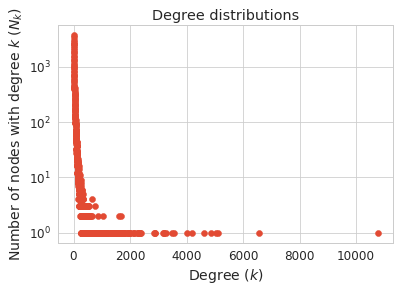

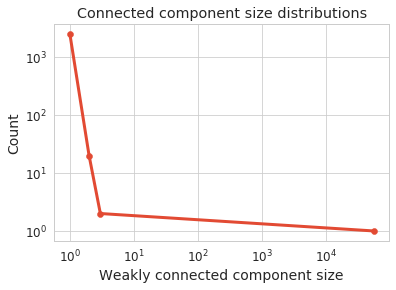

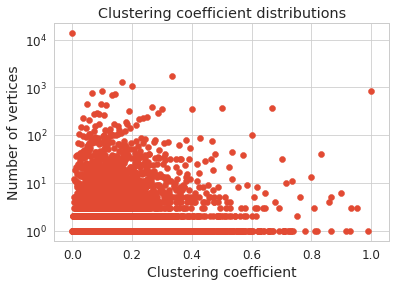

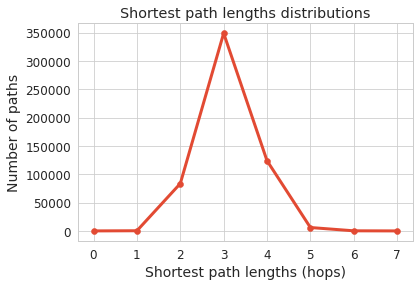

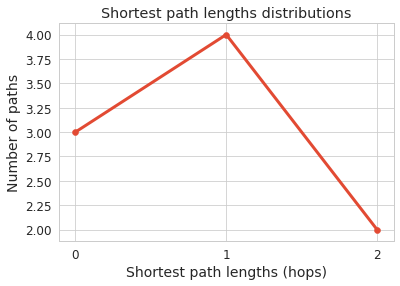

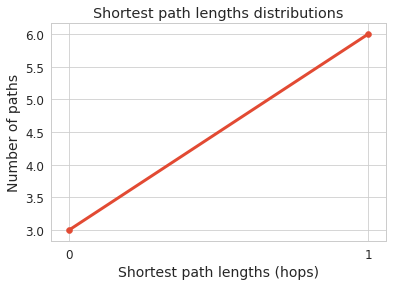

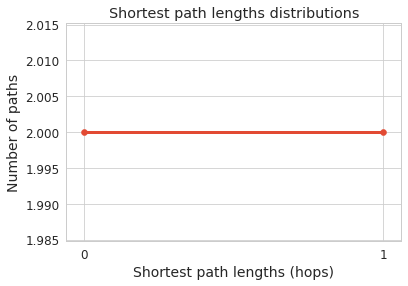

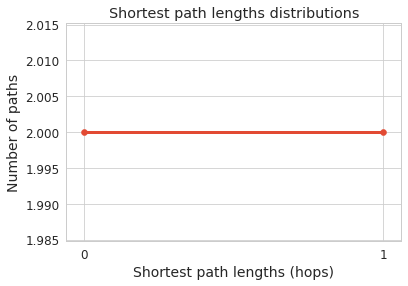

In [18]:
Degree_Distribution(G)
CC_Distribution(G)
Clustering_Analysis(G)
ShortestPaths_Analysis(G)

# Local CLustering Coefficient

In [19]:
def CC_by_degree(G):
    degree = G.degree()
    degree = [ deg for (v,deg) in degree ]
    clust = nx.clustering(G)
    local_clust_coefficient = [ v for v in clust.values() ]

    degs_count = {}
    C_k = {}
    i=0
    for deg in degree:
        if deg not in C_k :
            C_k [deg] = 0
            degs_count [deg] = 0
        C_k [deg] += local_clust_coefficient[i]
        degs_count [deg] += 1
        i += 1
    for (deg,count) in degs_count.items():
        C_k[deg] /= count 
    

    plt.scatter(C_k.keys(), C_k.values())
    ax = plt.gca()
    ax.set_xscale ( 'log')
    ax.set_yscale ( 'log')
    ax.set_xlim(0,10000)
    ax.set_ylim(0.001,1)
    plt.show()
    

<ipython-input-19-311d794405d7>:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,10000)


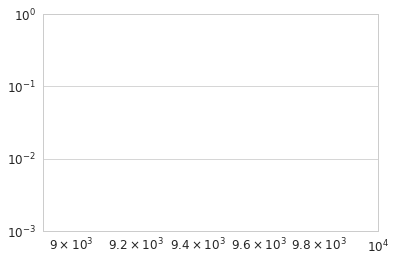

In [20]:
CC_by_degree(G)

<ipython-input-2-311d794405d7>:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,10000)


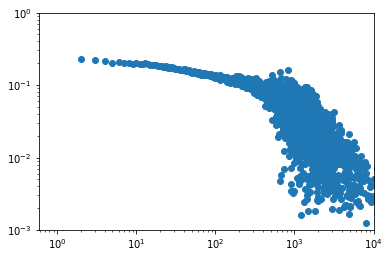

In [7]:
CC_by_degree(G)